<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

c:\Users\dasma\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\dasma\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\dasma\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

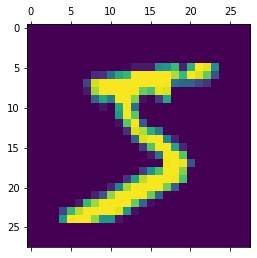

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [18]:
X_train.shape

(60000, 28, 28)

In [19]:
y_train.shape

(60000,)

In [11]:
# X_train_flattened = X_train.reshape(len(X_train), 28*28)
# X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
# X_train_flattened.shape

(60000, 784)

In [15]:
# X_train_flattened[0]

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

<img src="digits_nn.jpg" />

In [21]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=28, kernel_size=(3, 3), activation='relu', input_shape=(28, 28,1)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1650 - accuracy: 0.9499
Epoch 2/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0560 - accuracy: 0.9827
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0404 - accuracy: 0.9880
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0318 - accuracy: 0.9902
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0250 - accuracy: 0.9921


In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0345 - accuracy: 0.9890


[0.03448961302638054, 0.9890000224113464]

In [23]:
y_predicted = model.predict(X_test)
y_predicted[0]

313/313 [==============================] - 2s 5ms/step


array([1.6455054e-09, 4.5115829e-12, 3.6189957e-07, 1.9623490e-06,
       8.1134220e-13, 2.1824521e-10, 3.0062261e-17, 9.9999762e-01,
       9.6420800e-09, 8.5149551e-08], dtype=float32)

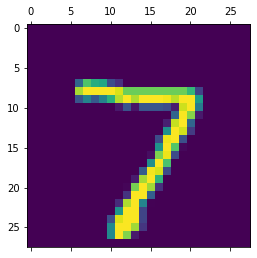

In [24]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [25]:
np.argmax(y_predicted[0])

7

In [26]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [27]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [28]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    1,    0,    0,    0,    1,    2,    1,    0],
       [   0, 1126,    2,    3,    1,    0,    1,    1,    1,    0],
       [   1,    0, 1020,    1,    1,    0,    0,    7,    2,    0],
       [   0,    0,    0, 1007,    0,    1,    0,    1,    1,    0],
       [   1,    0,    0,    1,  974,    0,    2,    1,    2,    1],
       [   1,    0,    0,   11,    0,  878,    1,    0,    1,    0],
       [   2,    2,    0,    1,    2,    5,  941,    0,    5,    0],
       [   0,    2,    1,    1,    1,    1,    0, 1020,    1,    1],
       [   2,    0,    1,    1,    0,    1,    0,    0,  969,    0],
       [   2,    0,    0,    5,    5,    4,    0,    4,    9,  980]])>

Text(69.0, 0.5, 'Truth')

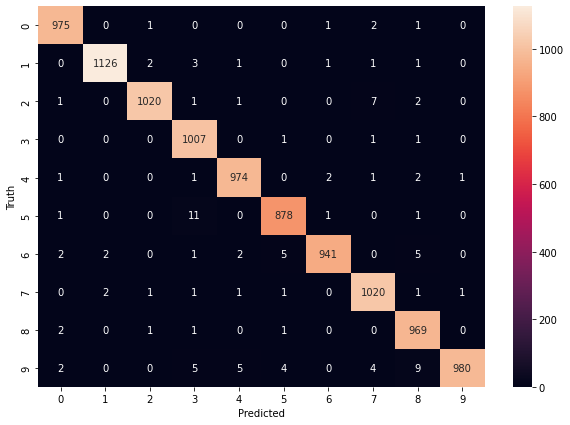

In [29]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [30]:
model = keras.Sequential([
     keras.layers.Conv2D(filters=28, kernel_size=(3, 3), activation='relu', input_shape=(28, 28,1)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1359 - accuracy: 0.9591
Epoch 2/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0456 - accuracy: 0.9858
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0306 - accuracy: 0.9900
Epoch 4/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0222 - accuracy: 0.9931
Epoch 5/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0172 - accuracy: 0.9944


In [31]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0298 - accuracy: 0.9902


[0.02978130802512169, 0.9901999831199646]

313/313 [==============================] - 2s 7ms/step


Text(69.0, 0.5, 'Truth')

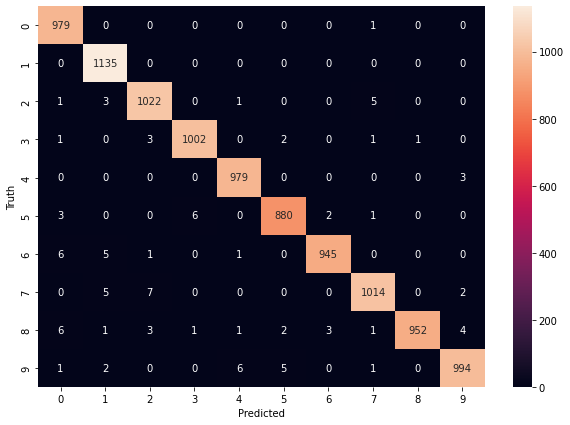

In [32]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [59]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2959 - accuracy: 0.9185
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1368 - accuracy: 0.9603
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0995 - accuracy: 0.9703
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0771 - accuracy: 0.9772
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0628 - accuracy: 0.9806
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0519 - accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0442 - accuracy: 0.9865
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0369 - accuracy: 0.9886
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0300 - accuracy: 0.9910
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.026

In [60]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0813 - accuracy: 0.9779


[0.08133944123983383, 0.9779000282287598]